<a href="https://colab.research.google.com/github/matheusglima/Python_Investing/blob/master/IFIX_vs_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (18, 8)

In [0]:
!pip install investpy
import investpy as inv

In [0]:
Indices = inv.get_indices(country='brazil')
Indices

,country,name,full_name,symbol,currency,class,market
0,brazil,MSCI Brazil Net USD,MSCI Brazil Net USD,MIBR00000NUS,USD,major_indices,global_indices
1,brazil,DJ Brazil,Dow Jones Brazil,BRDOW,BRL,major_indices,global_indices
2,brazil,TR Brazil 50,Thomson Reuters Brazil 50,TRX50BRP,BRL,additional_indices,global_indices
3,brazil,MSCI Brazil Price USD,MSCI Brazil Price USD,MSCIBR,USD,additional_indices,global_indices
4,brazil,DJ Brazil Titans 20 ADR,Dow Jones Brazil Titans 20 ADR,BR20,USD,additional_indices,global_indices
5,brazil,BNY Mellon Brazil ADR,BNY Mellon Brazil ADR,BKBR,USD,additional_indices,global_indices
6,brazil,BNY Mellon Brazil ADR TR,BNY Mellon Brazil ADR Total Return,BKBRT,USD,additional_indices,global_indices
7,brazil,BNY Mellon Brazil Classic ADR,BNY Mellon Brazil Classic ADR,BKCBR,USD,additional_indices,global_indices
8,brazil,BNY Mellon Brazil Classic ADR TR,BNY Mellon Brazil Classic ADR Total Return,BKCBRT,USD,additional_indices,global_indices
9,brazil,FTSE RAFI Brazil 50,FTSE RAFI Brazil 50,FTFRBR5,BRL,additional_indices,global_indices


In [0]:
IBOV = inv.get_index_historical_data('Bovespa', country='brazil', from_date='01/01/2014', to_date='04/06/2020')[['Close']]
IBOV_norm = IBOV / IBOV.iloc[0]
IBOV_norm

,Close
Date,
2014-01-02,1.000000
2014-01-03,1.012710
2014-01-06,1.012562
2014-01-07,1.001763
2014-01-08,1.004676
...,...
2020-05-29,1.736202
2020-06-01,1.760387
2020-06-02,1.808584


In [0]:
IFIX = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX', country='brazil', from_date='01/01/2014', to_date='04/06/2020')[['Close']]
IFIX_norm = IFIX / IFIX.iloc[0]

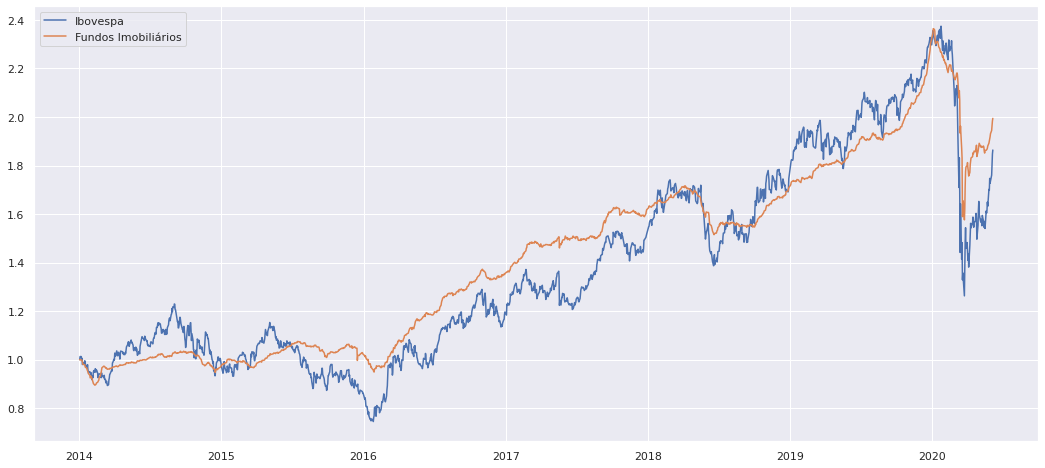

In [0]:
fig, ax = plt.subplots()
ax.plot(IBOV_norm, label='Ibovespa')
ax.plot(IFIX_norm, label='Fundos Imobiliários')
plt.legend()

Close    0.875187
dtype: float64

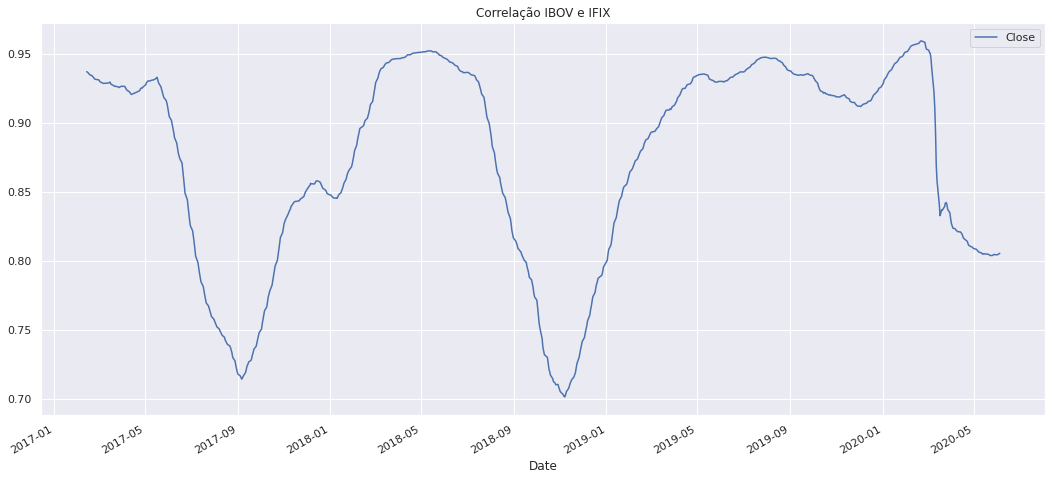

In [21]:
IBOV.rolling(252).corr(IFIX).plot(title='Correlação IBOV e IFIX')
IBOV.rolling(252).corr(IFIX).mean()

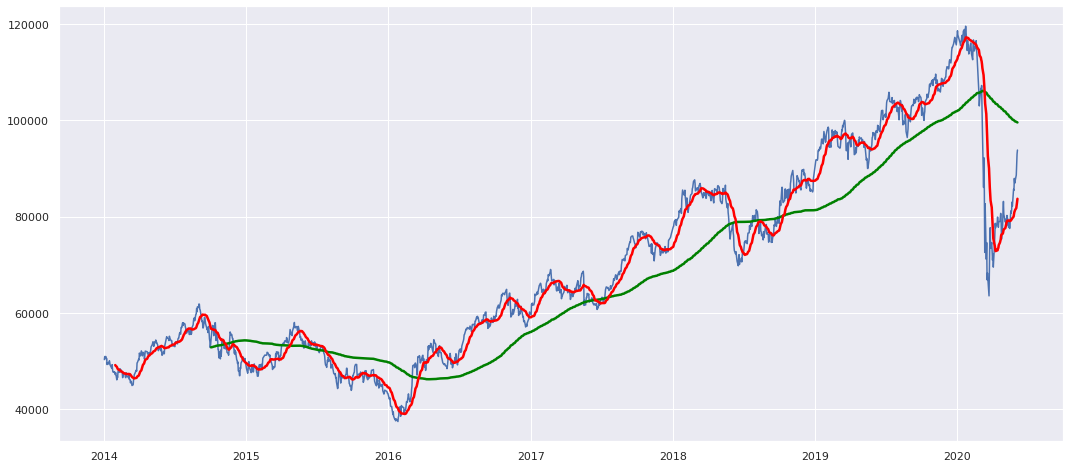

In [20]:
fig, ax = plt.subplots()
ax.plot(IBOV)
ax.plot(IBOV.rolling(200).mean(), color='green', linewidth=2.5)
ax.plot(IBOV.rolling(21).mean(), color='red', linewidth=2.5)